####  Rasmni yuklab olish uchun kerakli modullarni chaqiramiz

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

#### Test qilish uchun rasmlarni yuklab olamiz 

In [2]:
images = np.array([np.array(cv2.imread(file))[:,:,0] for file in glob.glob('mnist/*.jpg')])

#### Rasmlarni gray holatda chiqaramiz 

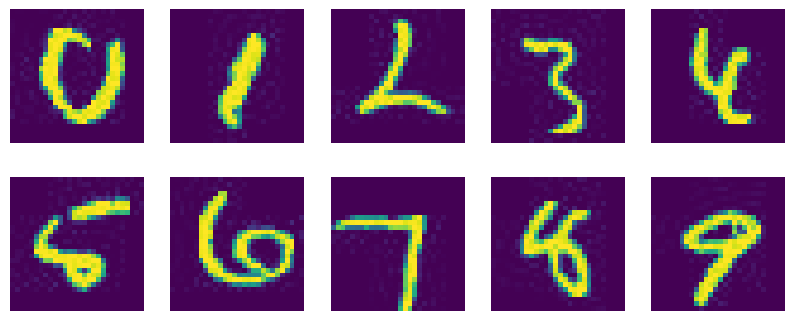

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axs.flatten()):
    if i < len(images):
        ax.imshow(images[i])
    ax.axis('off')
plt.show()

#### Rasmlar matritsalari qiymatlarini float32 formatga keltiramiz, normallashtiramiz va shape ni modelga berish uchun moslashtiramiz

In [4]:
images = images.astype('float32')/255
images = images.reshape(10,28,28,1)

#### Rasmlarni qiymatlarini bashorat qilish uchun Modelni yuklab olamiz

In [5]:
import tensorflow as tf
model = tf.keras.models.load_model("model.h5")

#### Rasmlarni predict qilamiz

In [6]:
one_hot_encoding_label = model.predict(images)

1/1 [==============================] - 0s 325ms/step


#### Natija sifatida olingan one hot encoding labellaridan natijani olamiz 

In [7]:
target = []
for i in range(len(images)):
    target.append(np.argmax(one_hot_encoding_label[i]))

target

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]